# <font color="gray">Problem Statement :
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

### Import basic libraries

In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

### Load dataset

In [298]:
data=pd.read_excel("flight-fareData\Flight_Fare.xlsx")

In [299]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis

* Price is target 

*   "Airline" "Date_of_Journey" "Source" "Destination" "Route" "Dep_Time" "Arrival_Time" "Duration" "Total_Stops" and "Additional_Info" : are input variables

* These variables collectively provide information about flights, their schedules, routes, and various details that passengers or booking systems might need when making travel arrangements or reservations.


### Basic Checks

In [300]:
# shape
data.shape

(10683, 11)

* <b><font color="green">Size of the Dataset: </b>

The dataset contains 10683 data records, which is a moderately large dataset. This can provide a substantial amount of information for analysis.

In [301]:
# print all columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [302]:
# dtypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

* The data consists of 10 categorical columns and 1 numerical column.


In [303]:
# head
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [304]:
# tail
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [305]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [306]:
# describe ( for numerical values)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


### Insights

* <b><font color="green">Mean Price:</b> 

The average price of the flights in the dataset is approximately 9087. This represents the central tendency of the prices. It can serve as a reference point to understand the typical cost of flights in the dataset.

* <b><font color="green">Standard Deviation: </b>

The standard deviation of approximately 4611 indicates the spread or dispersion of prices around the mean. A higher standard deviation suggests that the prices in the dataset vary widely from the average. In this case, the relatively high standard deviation suggests that flight prices have a significant degree of variability.

* <b><font color="green">Minimum Price: </b>

The lowest recorded price in the dataset is 1759. This information indicates that there are relatively affordable flight options available in the dataset.

* <b><font color="green">Maximum flight price : </b>

The maximum flight price of 79512 indicates that there are some relatively expensive flight options included in the data, possibly for premium or long-distance flights or special classes.

In [307]:
# describe ( for catégorical values)
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


### Insights

* <b><font color="green">Airline Distribution:</b>

<b>Jet Airways </b> is the most common airline, accounting for approximately <b>36%</b> of the dataset.
The remaining airlines make up the remaining 64% of the dataset.

* <b><font color="green">Source Distribution:</b>

Flights departing from <b>Delhi</b> make up about <b>42.5%</b> of the dataset.
The other source locations account for the remaining 57.5%.

* <b><font color="green">Destination Distribution:</b>

Flights heading to <b>Cochin</b> make up approximately <b>42.5%</b> of the dataset.
The other destination locations account for the remaining 57.5%.

* <b><font color="green">Route Distribution:</b>

The route <b>"DEL → BOM → COK"</b> is the most common and represents about <b>22.2%</b> of the dataset.
The other routes are less frequent.

* <b><font color="green">Duration Distribution:</b>

The duration <b>"2h 50m"</b> is the most common, representing approximately <b>52.6%</b> of the dataset.
Other durations are less frequent.

* <b><font color="green">Total Stops Distribution:</b>

Flights with <b>"1 stop"</b> account for the majority, making up around <b>52.7%</b> of the dataset.
Flights with other stop counts are less common.

* <b><font color="green">Additional Info Distribution:</b>

This column is dominated by the <b>"No info"</b> value, which accounts for approximately <b>80%</b> of the data. Consequently, it is advisable to remove or exclude this column from the dataset.

* The columns related to <b>'Departure Time Distribution'</b> <b>'Date of Journey Distribution'</b> and <b>'Arrival Time Distribution'</b> appear to contain less significant information at this stage. We will reevaluate their importance and relevance after performing data preprocessing and analysis.

In [308]:
# Check for missing values
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [309]:
# check percentage of missing values
data.isnull().sum()/len(data)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

* Only Two rows with missing values from 10683. This two rows can be considered for removal in subsequent data cleaning processes. 

## Exploratory Data Analysis

### univariate analysis
* Analysing single variables
* check the distribution of each column

In [310]:
df = pd.DataFrame(data)

In [311]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


* <b><font color="green">Check distribution of Price</b>

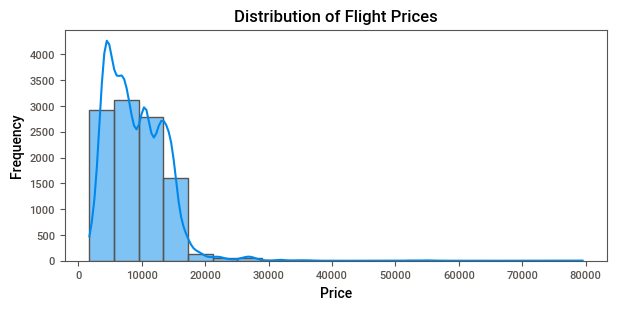

In [312]:
# Plot the distribution of prices using a histogram
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
# Adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()

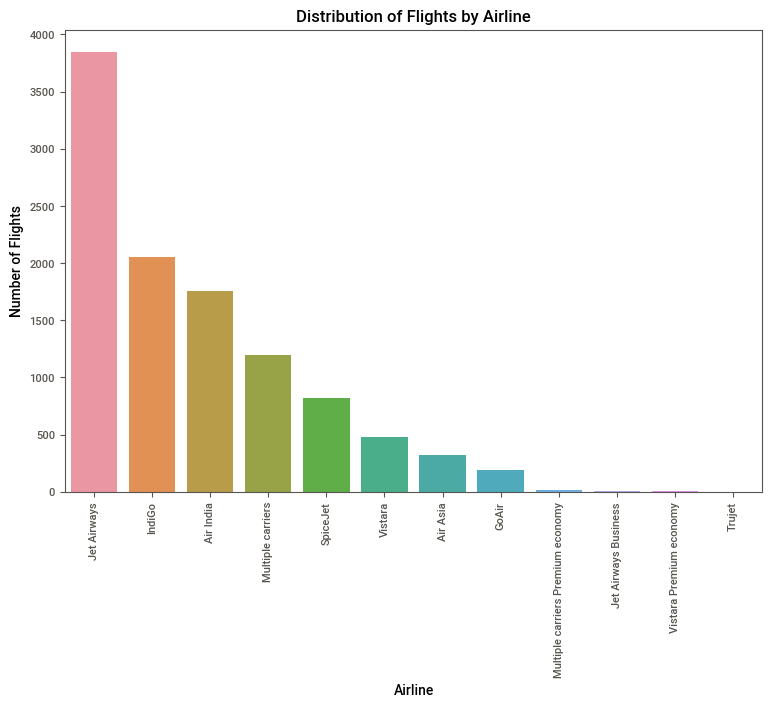

In [313]:
# Plot the distribution of flights by airline
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.show()

Value with the maximum frequency: 170.0


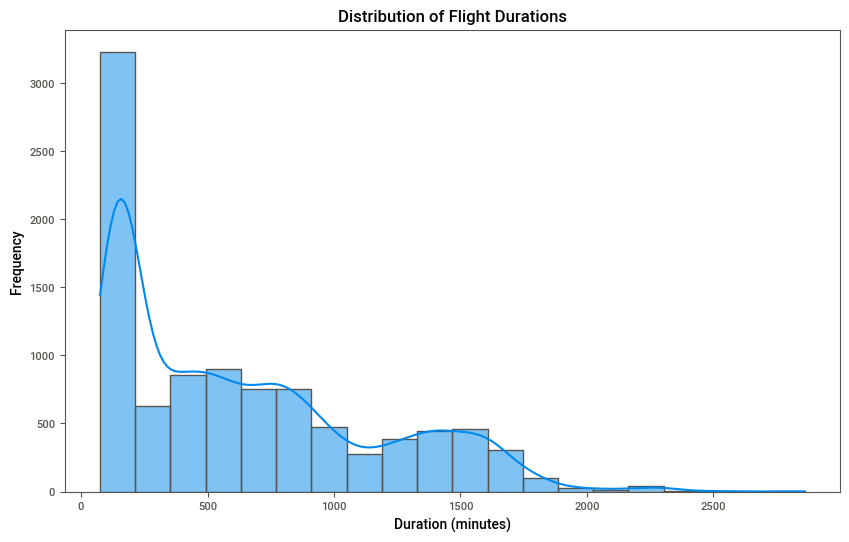

In [314]:
# Extract hours and minutes from the 'Duration' column
df['Duration_hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)m').astype(float)

# Calculate total duration in minutes
df['Total_Duration_minutes'] = df['Duration_hours'] * 60 + df['Duration_minutes']
most_common_value = df['Total_Duration_minutes'].value_counts().idxmax()
print("Value with the maximum frequency:", most_common_value)
#Plot the distribution of flight durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Duration_minutes', bins=20, kde=True)  
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Durations')
plt.show()

### Insights 

* <b><font color="green">The price data exhibits skewness and does not follow a normal distribution.  </b>
* <b><font color="green">Jet Airways Business have the hignest number of flights. </b>
* <b><font color="green">The most fréquent Duration of flights by minutes is approximatly 3 hours . </b>

## Data Exploration :

### Bivariate analysis 

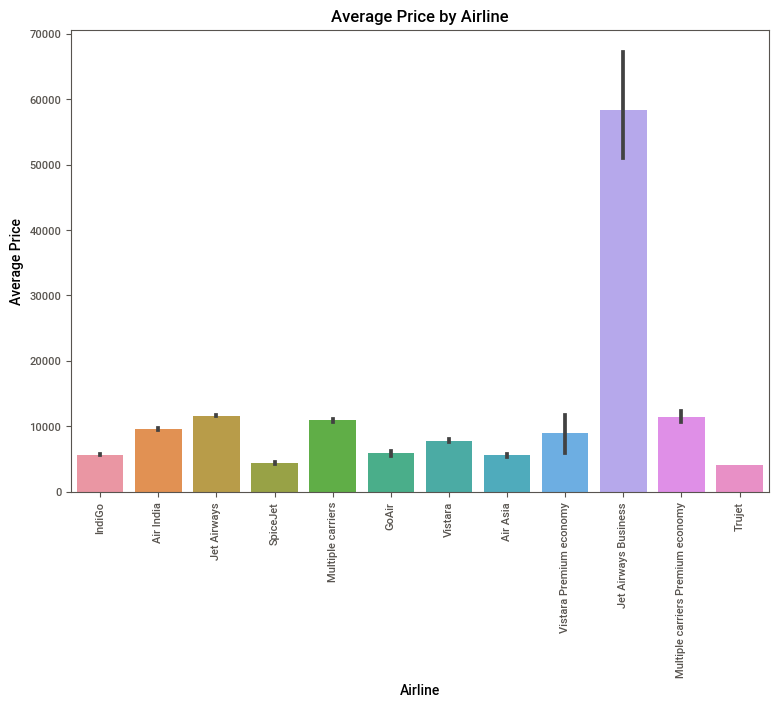

In [315]:
# Plot the distribution of Price by Airline
plt.figure(figsize=(9, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Price by Airline')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

### Insights

* <b><font color="green">Jet Airways Business have the hignest average of price and the hignest number of flights </b>

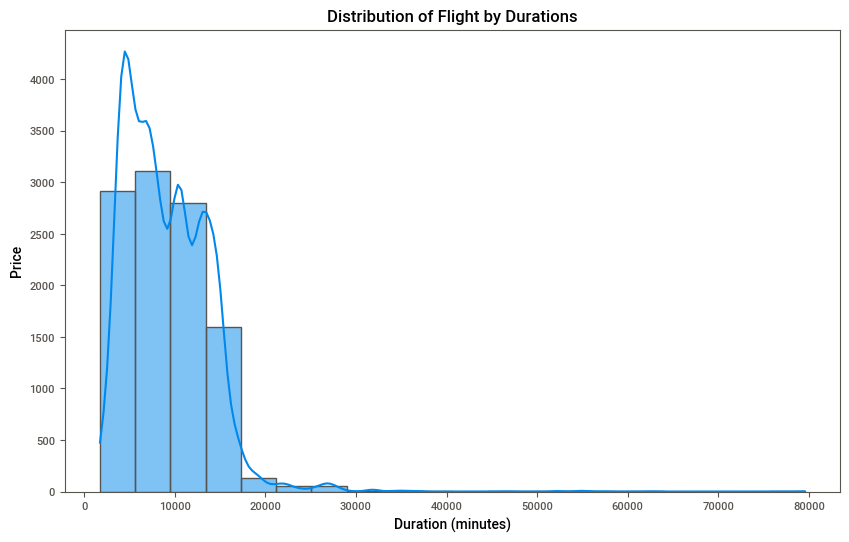

In [316]:
# Plot the distribution of price durations using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=20, kde=True)  
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.title('Distribution of Flight by Durations')
plt.show()


### Insights

* <b><font color="green">The price and duration have an inverse relationship, where a shorter duration corresponds to a higher price. </b>

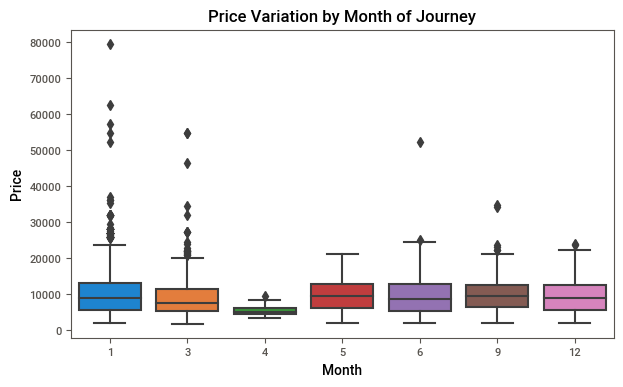

In [317]:
#  Date Analysis
# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
# Extract month from 'Date_of_Journey'
df['Journey_Month'] = df['Date_of_Journey'].dt.month
# Box plot of Price by Month
plt.figure(figsize=(7, 4))
sns.boxplot(x='Journey_Month', y='Price', data=df)
plt.title('Price Variation by Month of Journey')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


### Insights

* <b><font color="green">There is no price variation based on the month.There is some minor variability, but it's not significant. </b>

In [318]:
# Correlation Analysis
corr_matrix = df.corr()
print(corr_matrix['Price'])

Price                     1.000000
Duration_hours            0.508985
Duration_minutes         -0.115713
Total_Duration_minutes    0.512132
Journey_Month             0.010700
Name: Price, dtype: float64


# Insights 

* the price tends to increase as the duration (in both hours and total minutes) increases, suggesting a positive relationship. However, the month of the journey has almost no influence on the price. 
* Additionally, the correlation with 'Duration_minutes' is very weak, indicating that it has minimal impact on the price.

In [319]:
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_hours', 'Duration_minutes',
       'Total_Duration_minutes', 'Journey_Month'],
      dtype='object')


In [320]:
data.drop("Duration_hours", axis = 1, inplace = True)


In [321]:
data.drop("Duration_minutes", axis = 1, inplace = True)


In [322]:
data.drop("Total_Duration_minutes", axis = 1, inplace = True)


In [323]:
data.drop("Journey_Month", axis = 1, inplace = True)

In [324]:
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


# Data Preprocessing

In [325]:
# number of rows with missing values is relatively small compared to your dataset's size
#and removing them doesn't significantly impact the quality of your data==> i will drop these rows.

In [326]:
data.dropna(subset=['Route'], inplace=True)


In [327]:
data.dropna(subset=['Total_Stops'], inplace=True)


In [328]:
# Re check for missing values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Check for duplicates and handling them

In [329]:
# check for duplicate values
data.duplicated().sum()

220

In [330]:
#Remove Duplicate Rows
data.drop_duplicates(inplace=True)

In [331]:
# Re check for duplicate values
data.duplicated().sum()


0

In [332]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

## Check for outliers

<Axes: xlabel='Price'>

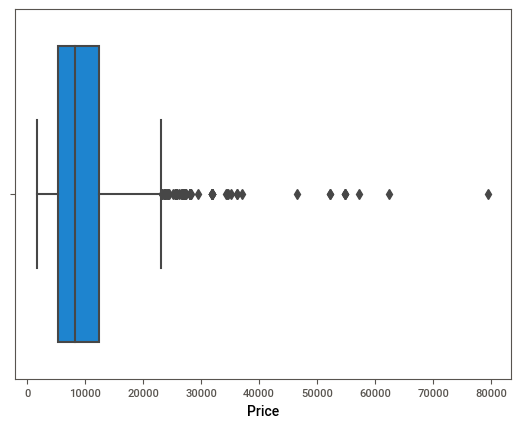

In [333]:
# check outliers in price
sns.boxplot(x=data.Price)

* <I> We can see many outliers in Price column.</I> 
* <I> outliers in Price are seen toward right side.</I> 

* To handle those outliers
* IQR- Use this method when data is not normal
* 3-sigma rule - use this method when data is normal

<b><font color="green">Steps:</font></b>
* find Q1 and Q3
* fid IQR=Q3-Q1
* find lower limit and upper limit
* lower_limit=Q1-1.5*IQR
* upper_limit=Q3+1.5*IQR
* Find records/values which are greater than upper limit and less than lower limit



In [334]:
# find Q1 and Q3
Q1=data['Price'].quantile(0.25)
print("lower quartile",Q1)
Q3=data['Price'].quantile(0.75)
print("upper quartile",Q3)


lower quartile 5224.0
upper quartile 12344.75


In [335]:
# find IQR
IQR=Q3-Q1
IQR

7120.75

In [336]:
# find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower limit is -5457.125
upper_limit is 23025.875


In [337]:
# find values above upper_limit
data.loc[data['Price']>upper_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,2019-01-03,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,2019-06-03,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,2019-06-03,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [338]:
len(data.loc[data['Price']>upper_limit])/len(data)

0.008984897725100364

In [339]:
# find values below lower limit
data.loc[data['Price']<lower_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [340]:
# How to handle outliers
# since data is not normal will replace outliers with median
data.loc[data['Price']>upper_limit,"Price"]=data["Price"].median()

<Axes: xlabel='Price'>

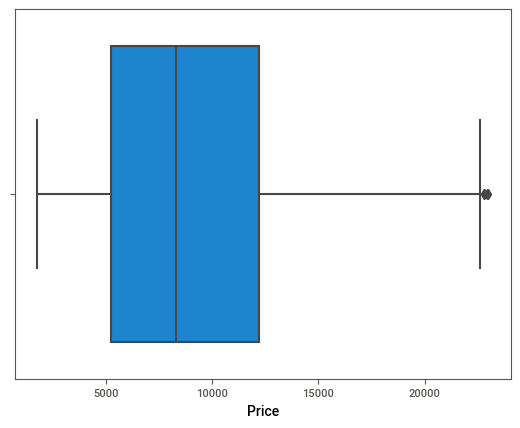

In [341]:
# check are there any outliers in Price
sns.boxplot(x=data.Price)

# Data Processing

In [342]:
print(data.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [343]:
from sklearn.preprocessing import LabelEncoder

# Replace 'Delhi' with 'New Delhi' in the 'Destination' column
# as we need to clean the data before analysing it
df['Destination'] = df['Destination'].replace('Delhi', 'New Delhi')

# Encode categorical variables

    # As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()



# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

data = pd.concat([data, Airline, Source, Destination], axis = 1)



# Replace Values 'Total_Stops' with corresponding keys

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

    
# 'Duration'
# Convert Duration to total minutes
data['Duration_hours'] = data['Duration'].str.extract(r'(\d+)h').astype(float).fillna(0)
data['Duration_minutes'] = data['Duration'].str.extract(r'(\d+)m').astype(float).fillna(0)

# keep only total
#data['Duration_total_minutes'] = data['Duration_hours'] * 60 + data['Duration_minutes']

# 'Date_of_Journey'
# Parse Date_of_Journey column and extract features (day, month, year)
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year

# 'Dep_Time'
# Extract hours and minutes from Dep_Time
data['Dep_Hours'] = data['Dep_Time'].str.extract(r'(\d+):(\d+)')[0].astype(int)
data['Dep_Minutes'] = data['Dep_Time'].str.extract(r'(\d+):(\d+)')[1].astype(int)

# Convert Dep_Time to minutes
#data['Dep_Minutes_Since_Midnight'] = data['Dep_Hours'] * 60 + data['Dep_Minutes']


# 'Arrival_Time'
# Extract time of arrival (if available)
data['Arrival_Time'] = data['Arrival_Time'].str.extract(r'(\d+:\d+)')
# Extract day and month (if available)
data['Arrival_Day'] = data['Arrival_Time'].str.extract(r'(\d+) (\w{3})')[0]
data['Arrival_Month'] = data['Arrival_Time'].str.extract(r'(\d+) (\w{3})')[1]

# Convert the extracted values to datetime
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(data['Arrival_Time'], format='%H:%M').dt.minute


In [344]:
data.isnull().sum()

Airline                                          0
Date_of_Journey                                  0
Source                                           0
Destination                                      0
Route                                            0
Dep_Time                                         0
Arrival_Time                                     0
Duration                                         0
Total_Stops                                      0
Additional_Info                                  0
Price                                            0
Airline_Air India                                0
Airline_GoAir                                    0
Airline_IndiGo                                   0
Airline_Jet Airways                              0
Airline_Jet Airways Business                     0
Airline_Multiple carriers                        0
Airline_Multiple carriers Premium economy        0
Airline_SpiceJet                                 0
Airline_Trujet                 

In [345]:
# keep Dep_Minutes_Since_Midnight
data.drop(columns=['Dep_Time'], inplace=True)


In [346]:
# keep only month
data.drop(columns=['Date_of_Journey'], inplace=True)


In [347]:
# all data is in 2019
# Consequently, this column will be removed from the dataset.
data.drop(columns=['Journey_year'], inplace=True)


In [348]:
# Additional_Info column is dominated by the "No info" value, which accounts for approximately 80% of the data. 
# Consequently, this column will be removed from the dataset.
data.drop(columns=['Additional_Info'], inplace=True)

In [349]:
# we will drop root because we find info in number stops
data.drop(columns=['Route'], inplace=True)


In [350]:
# we will keep only Duration_total_minutes
data.drop(columns=['Duration'], inplace=True)


In [351]:
# we will keep only Duration_total_minutes
data.drop(columns=['Arrival_Day', 'Arrival_Month'], inplace=True)

In [352]:
print(data.columns)

Index(['Airline', 'Source', 'Destination', 'Arrival_Time', 'Total_Stops',
       'Price', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Duration_hours',
       'Duration_minutes', 'Journey_day', 'Journey_month', 'Dep_Hours',
       'Dep_Minutes'],
      dtype='object')


In [353]:
data.drop(columns=['Airline', 'Source', 'Destination'], inplace=True)

In [354]:
data.drop(columns=['Dep_Minutes', 'Duration_minutes'], inplace=True)

In [355]:
print(data.columns)

Index(['Arrival_Time', 'Total_Stops', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Duration_hours',
       'Journey_day', 'Journey_month', 'Dep_Hours'],
      dtype='object')


# Feature Engineering

### <font color="green">Droping irrelevant columns and Selecting best features

* Drop the columns which has very less correlation with target variables.
* Drop one of the column if two input variables has high correlation

In [356]:
data.corr()

,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Journey_day,Journey_month,Dep_Hours
Arrival_Time,1.000000,0.047414,0.042312,0.086463,0.021997,-0.074634,-0.018169,-0.014617,0.060247,0.013438,...,-0.032302,-0.009776,-0.029650,-0.032302,-0.017399,-0.002888,0.062862,-0.001934,-0.004014,-0.000891
Total_Stops,0.047414,1.000000,0.662478,0.272543,-0.057547,-0.294993,0.197439,0.019256,0.134335,0.010555,...,-0.260668,0.474480,-0.450456,-0.260668,-0.236125,-0.000170,0.730156,-0.035371,0.065438,-0.067523
Price,0.042312,0.662478,1.000000,0.061319,-0.100659,-0.384163,0.442693,-0.003322,0.168715,0.022561,...,-0.256019,0.322559,-0.337245,-0.256019,-0.193770,0.107732,0.567567,-0.147984,0.068811,0.004967
Airline_Air India,0.086463,0.272543,0.061319,1.000000,-0.060418,-0.216526,-0.325139,-0.010529,-0.157916,-0.015504,...,0.024080,-0.000284,-0.067512,0.024080,-0.050823,0.056059,0.260713,-0.037436,0.002112,-0.020731
Airline_GoAir,0.021997,-0.057547,-0.100659,-0.060418,1.000000,-0.067711,-0.101677,-0.003293,-0.049383,-0.004848,...,-0.036723,-0.006572,0.098974,-0.036723,-0.026722,0.017694,-0.092784,0.003205,-0.017674,-0.016309
Airline_IndiGo,-0.074634,-0.294993,-0.384163,-0.216526,-0.067711,1.000000,-0.364391,-0.011800,-0.176980,-0.017376,...,0.057911,-0.070208,0.087989,0.057911,0.141073,-0.026885,-0.341076,0.016175,-0.036564,-0.022254
Airline_Jet Airways,-0.018169,0.197439,0.442693,-0.325139,-0.101677,-0.364391,1.000000,-0.017720,-0.265756,-0.026091,...,-0.022049,-0.040026,-0.047451,-0.022049,-0.143805,0.066380,0.299088,-0.035165,0.055666,0.120596
Airline_Jet Airways Business,-0.014617,0.019256,-0.003322,-0.010529,-0.003293,-0.011800,-0.017720,1.000000,-0.008606,-0.000845,...,-0.006400,-0.003985,-0.008884,-0.006400,-0.004657,0.049146,-0.011512,-0.026241,-0.026936,-0.007579
Airline_Multiple carriers,0.060247,0.134335,0.168715,-0.157916,-0.049383,-0.176980,-0.265756,-0.008606,1.000000,-0.012672,...,-0.095984,0.426279,-0.133242,-0.095984,-0.069844,-0.111157,0.001100,0.051439,-0.002746,-0.151549
Airline_Multiple carriers Premium economy,0.013438,0.010555,0.022561,-0.015504,-0.004848,-0.017376,-0.026091,-0.000845,-0.012672,1.000000,...,-0.009424,0.041851,-0.013081,-0.009424,-0.006857,-0.010913,-0.001406,0.033582,-0.029848,-0.029004


<Axes: >

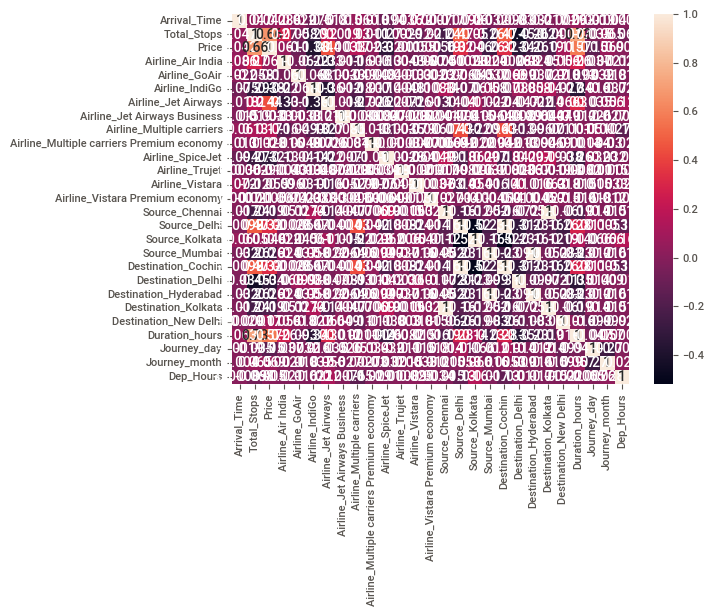

In [357]:
data.corr()
sns.heatmap(data.corr(),annot=True)
# annot=True is used for labelling the corr values


In [358]:
#df = pd.DataFrame(data)

In [359]:
#df

In [360]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[["Arrival_Time","Price"]]=scale.fit_transform(data[["Arrival_Time","Price"]])

In [361]:
data

,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Journey_day,Journey_month,Dep_Hours
0,0.045455,0,0.100650,0,0,1,0,0,0,0,...,0,0,0,0,0,1,2.0,24,3,22
1,0.552448,2,0.277893,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.0,5,1,5
2,0.181818,2,0.570709,0,0,0,1,0,0,0,...,0,1,0,0,0,0,19.0,6,9,9
3,0.982517,1,0.209914,0,0,1,0,0,0,0,...,0,0,0,0,0,0,5.0,5,12,18
4,0.902098,1,0.543405,0,0,1,0,0,0,0,...,0,0,0,0,0,1,4.0,3,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.937063,0,0.110536,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,4,9,19
10679,0.975524,0,0.112325,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,27,4,20
10680,0.472028,0,0.257509,0,0,0,1,0,0,0,...,0,0,1,0,0,0,3.0,27,4,8
10681,0.590909,0,0.512617,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,3,1,11


### Split data into x and y

In [362]:
x=data.drop('Price',axis=1)
y=data['Price']

In [363]:
data

,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Journey_day,Journey_month,Dep_Hours
0,0.045455,0,0.100650,0,0,1,0,0,0,0,...,0,0,0,0,0,1,2.0,24,3,22
1,0.552448,2,0.277893,1,0,0,0,0,0,0,...,0,0,0,0,0,0,7.0,5,1,5
2,0.181818,2,0.570709,0,0,0,1,0,0,0,...,0,1,0,0,0,0,19.0,6,9,9
3,0.982517,1,0.209914,0,0,1,0,0,0,0,...,0,0,0,0,0,0,5.0,5,12,18
4,0.902098,1,0.543405,0,0,1,0,0,0,0,...,0,0,0,0,0,1,4.0,3,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.937063,0,0.110536,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,4,9,19
10679,0.975524,0,0.112325,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,27,4,20
10680,0.472028,0,0.257509,0,0,0,1,0,0,0,...,0,0,1,0,0,0,3.0,27,4,8
10681,0.590909,0,0.512617,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,3,1,11


In [364]:
y

0        0.100650
1        0.277893
2        0.570709
3        0.209914
4        0.543405
           ...   
10678    0.110536
10679    0.112325
10680    0.257509
10681    0.512617
10682    0.470483
Name: Price, Length: 10462, dtype: float64

In [365]:
x

,Arrival_Time,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Journey_day,Journey_month,Dep_Hours
0,0.045455,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,2.0,24,3,22
1,0.552448,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.0,5,1,5
2,0.181818,2,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,19.0,6,9,9
3,0.982517,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5.0,5,12,18
4,0.902098,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,4.0,3,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.937063,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,4,9,19
10679,0.975524,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,27,4,20
10680,0.472028,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,3.0,27,4,8
10681,0.590909,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,3,1,11


In [366]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [367]:
print(selection.feature_importances_)


[5.15086101e-02 2.59898341e-01 1.73328377e-02 2.62868694e-03
 1.73011159e-02 1.55714881e-01 1.20517002e-04 2.61008716e-02
 1.38119546e-03 3.63317751e-03 1.07997700e-04 7.17156905e-03
 2.10124088e-04 6.52623168e-04 1.17860101e-02 7.33220587e-03
 5.68773010e-03 1.88443435e-02 1.69294037e-02 4.94004241e-03
 7.25064576e-04 1.62464367e-02 1.77219102e-01 9.77262916e-02
 5.44753168e-02 4.43255034e-02]


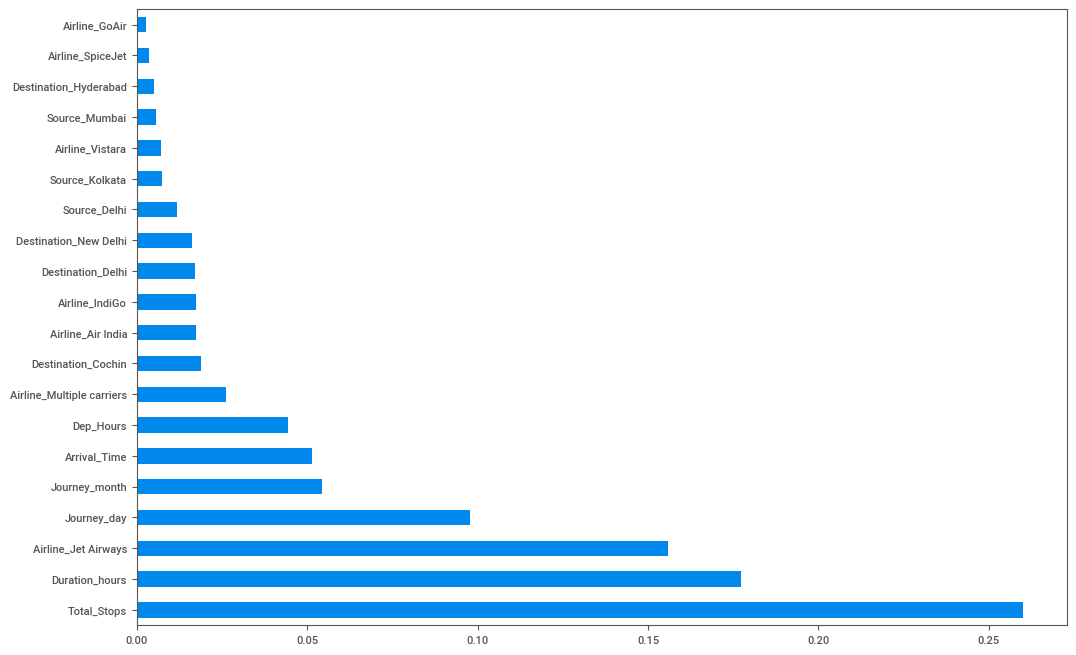

In [368]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Split data for training and testing

# Sklearn
It is one of the scientific library which includes all the packages related to Machine learning, data cleaning and feature engineering

In [369]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [370]:
X_train.shape

(7323, 26)

In [371]:
X_test.shape

(3139, 26)

In [372]:
y_train.shape

(7323,)

In [373]:
y_test.shape

(3139,)

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Arrival_Time                               10462 non-null  float64
 1   Total_Stops                                10462 non-null  int64  
 2   Price                                      10462 non-null  float64
 3   Airline_Air India                          10462 non-null  uint8  
 4   Airline_GoAir                              10462 non-null  uint8  
 5   Airline_IndiGo                             10462 non-null  uint8  
 6   Airline_Jet Airways                        10462 non-null  uint8  
 7   Airline_Jet Airways Business               10462 non-null  uint8  
 8   Airline_Multiple carriers                  10462 non-null  uint8  
 9   Airline_Multiple carriers Premium economy  10462 non-null  uint8  
 10  Airline_SpiceJet      

# Model Building LinearRegression

In [375]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# initialise model
model=LinearRegression()
# Train model with x_train and y-train
model.fit(X_train,y_train)
# make predictions /test model
y_pred=model.predict(X_test)
# slopes/coefficients of x
model.coef_
# intercept
model.intercept_

0.14822994122076696

# Evaluate the model

In [376]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [377]:
# MSE(Mean Squared error)
MSE=mean_squared_error(y_test,y_pred)
# MAE(Mean absolute error)
MAE=mean_absolute_error(y_test,y_pred)
# RMSE(Root mean squared error)
rmse=np.sqrt(MSE)
# r2_score
r2_LinearRegression = r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_LinearRegression)


Mean Absolute Error (MAE): 0.08725211999228606
Mean Squared Error (MSE): 0.01337241379411433
Root Mean Squared Error (RMSE): 0.11563915337857818
R-squared (R2) Score: 0.6265171270393823


# Model building RandomForestRegressor

In [378]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train, y_train)
r2 = reg_rf.score(X_test, y_test)


# Evaluate the model

In [379]:
# MSE(Mean Squared error)
MSE=mean_squared_error(y_test,y_pred)
# MAE(Mean absolute error)
MAE=mean_absolute_error(y_test,y_pred)
# RMSE(Root mean squared error)
rmse=np.sqrt(MSE)
# r2_score
r2_RandomForestRegressor = r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_RandomForestRegressor)


Mean Absolute Error (MAE): 0.057746155517318036
Mean Squared Error (MSE): 0.007833113270120056
Root Mean Squared Error (RMSE): 0.08850487709793205
R-squared (R2) Score: 0.7812262099129772


# Building model GradientBoostingRegressor

In [380]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_GradientBoostingRegressor = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_GradientBoostingRegressor)

# Optionally, you can visualize the feature importances
feature_importances = gb_regressor.feature_importances_
# Assign feature_importances to your feature columns for interpretation






Mean Absolute Error (MAE): 0.06905355392235146
Mean Squared Error (MSE): 0.008759213402722486
Root Mean Squared Error (RMSE): 0.09359066942127557
R-squared (R2) Score: 0.7553608318668835


# Building model SVR

In [381]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr_regressor.predict(X_test_scaled)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_SVR = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_SVR)


Mean Absolute Error (MAE): 0.07946199771245561
Mean Squared Error (MSE): 0.010595618009243144
Root Mean Squared Error (RMSE): 0.10293501838171082
R-squared (R2) Score: 0.7040712383109825


# neural network model for regression

In [382]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [383]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron (regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_neural_network_model_for_regression = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_neural_network_model_for_regression)

Epoch 1/50
229/229 [==============================] - 1s 2ms/step - loss: 0.0439
Epoch 2/50
229/229 [==============================] - 1s 3ms/step - loss: 0.0631
Epoch 3/50
229/229 [==============================] - 1s 2ms/step - loss: 0.0611
Epoch 4/50
229/229 [==============================] - 0s 2ms/step - loss: 0.0248
Epoch 5/50
229/229 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 6/50
229/229 [==============================] - 1s 3ms/step - loss: 0.0118
Epoch 7/50
229/229 [==============================] - 1s 2ms/step - loss: 0.0136
Epoch 8/50
229/229 [==============================] - 1s 2ms/step - loss: 0.0239
Epoch 9/50
229/229 [==============================] - 1s 3ms/step - loss: 0.0135
Epoch 10/50
229/229 [==============================] - 1s 3ms/step - loss: 0.0138
Epoch 11/50
229/229 [==============================] - 1s 3ms/step - loss: 0.0213
Epoch 12/50
229/229 [==============================] - 1s 3ms/step - loss: 0.0263
Epoch 13/50
229/229 [====

# R squared of all models

In [384]:
print("R-squared (R2)")
print("LinearRegression Score :", r2_LinearRegression)
print("RandomForestRegressor Score:", r2_RandomForestRegressor)
print("GradientBoostingRegressor Score:", r2_GradientBoostingRegressor)
print("SVR Score:", r2_SVR)
print("neural network model for regression Score:", r2_neural_network_model_for_regression)

R-squared (R2)
LinearRegression Score : 0.6265171270393823
RandomForestRegressor Score: 0.7812262099129772
GradientBoostingRegressor Score: 0.7553608318668835
SVR Score: 0.7040712383109825
neural network model for regression Score: 0.7288126069351344


# Visualize the result RandomForestRegressor  Best score 0.7812262099129772

### Scatter plot
A scatter plot is a straightforward way to visualize how well the predicted values align with the actual target values. We can create a scatter plot with the actual target values on the x-axis and the predicted values on the y-axis. Points that fall along a diagonal line represent perfect predictions.

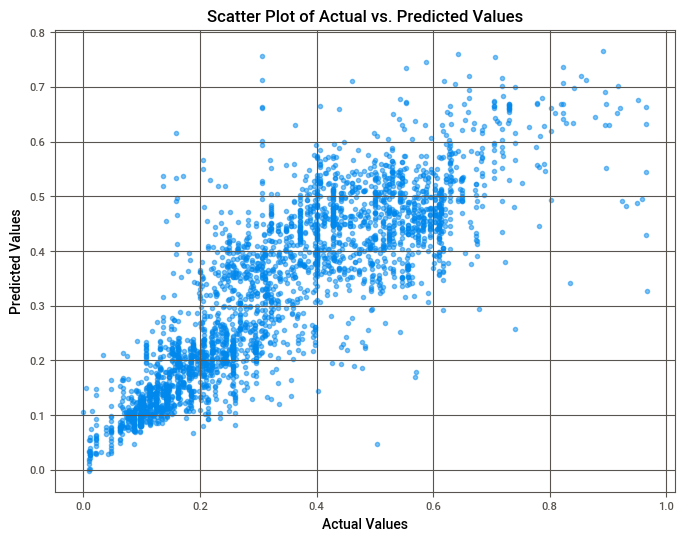

In [385]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.grid(True)
plt.show()

### Residual plot
A residual plot shows the residuals, which are the differences between the actual and predicted values. This plot helps identify patterns or trends in the residuals, which can provide insights into the model's performance.

## Trying different hyperparameter combinations : Grid Search:

In [386]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create a RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_  # GridSearchCV uses negative MSE for scoring

print("Best Hyperparameters:", best_params)
print("Best Mean Squared Error:", best_mse)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 300}
Best Mean Squared Error: 0.0075707582069037575


In [387]:
# Instantiate the RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_leaf=5, random_state=42)

# Fit the model to your training data
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
best_rf.score(X_train, y_train)
best_rf.score(X_test, y_test)
# MSE(Mean Squared error)
MSE=mean_squared_error(y_test,y_pred)
# MAE(Mean absolute error)
MAE=mean_absolute_error(y_test,y_pred)
# RMSE(Root mean squared error)
rmse=np.sqrt(MSE)
# r2_score
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.056553144732282214
Mean Squared Error (MSE): 0.006933483165010733
Root Mean Squared Error (RMSE): 0.08326753968390524
R-squared (R2) Score: 0.8063522972021677


# R-squared (R2) Score: 0.8063522972021677